In [15]:
import pandas as pd
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

data = pd.read_csv("practice.csv")
data.head()

,"日付,","つぶやき(ビッグデータ),","アクセス数(ビッグデータ),","つぶやき(データベース),","アクセス数(データベース),","アクセス平均年齢,",売上
0,2011/4/1,1292,1540,1509,1613,48,70
1,2011/4/2,1320,1399,417,1310,49,69
2,2011/4/3,1394,1281,113,943,39,74
3,2011/4/4,1399,1338,378,1093,44,73
4,2011/4/5,1270,1396,991,1304,41,69


In [17]:
data.columns = ['Date', 'Tweets_Bigdata', 'Access_Bigdata', 'Tweets_Database', 'Access_Database', 'Age', 'Sales']
data.corr(numeric_only = True)

,Tweets_Bigdata,Access_Bigdata,Tweets_Database,Access_Database,Age,Sales
Tweets_Bigdata,1.000000,0.487788,-0.000504,0.018361,-0.519237,0.697879
Access_Bigdata,0.487788,1.000000,0.403718,0.733612,-0.463758,0.672507
Tweets_Database,-0.000504,0.403718,1.000000,0.574563,0.047352,-0.031471
Access_Database,0.018361,0.733612,0.574563,1.000000,0.041875,-0.009579
Age,-0.519237,-0.463758,0.047352,0.041875,1.000000,-0.728052
Sales,0.697879,0.672507,-0.031471,-0.009579,-0.728052,1.000000


array([[<Axes: xlabel='Tweets_Bigdata', ylabel='Tweets_Bigdata'>,
        <Axes: xlabel='Access_Bigdata', ylabel='Tweets_Bigdata'>,
        <Axes: xlabel='Tweets_Database', ylabel='Tweets_Bigdata'>,
        <Axes: xlabel='Access_Database', ylabel='Tweets_Bigdata'>,
        <Axes: xlabel='Age', ylabel='Tweets_Bigdata'>,
        <Axes: xlabel='Sales', ylabel='Tweets_Bigdata'>],
       [<Axes: xlabel='Tweets_Bigdata', ylabel='Access_Bigdata'>,
        <Axes: xlabel='Access_Bigdata', ylabel='Access_Bigdata'>,
        <Axes: xlabel='Tweets_Database', ylabel='Access_Bigdata'>,
        <Axes: xlabel='Access_Database', ylabel='Access_Bigdata'>,
        <Axes: xlabel='Age', ylabel='Access_Bigdata'>,
        <Axes: xlabel='Sales', ylabel='Access_Bigdata'>],
       [<Axes: xlabel='Tweets_Bigdata', ylabel='Tweets_Database'>,
        <Axes: xlabel='Access_Bigdata', ylabel='Tweets_Database'>,
        <Axes: xlabel='Tweets_Database', ylabel='Tweets_Database'>,
        <Axes: xlabel='Access_Database',

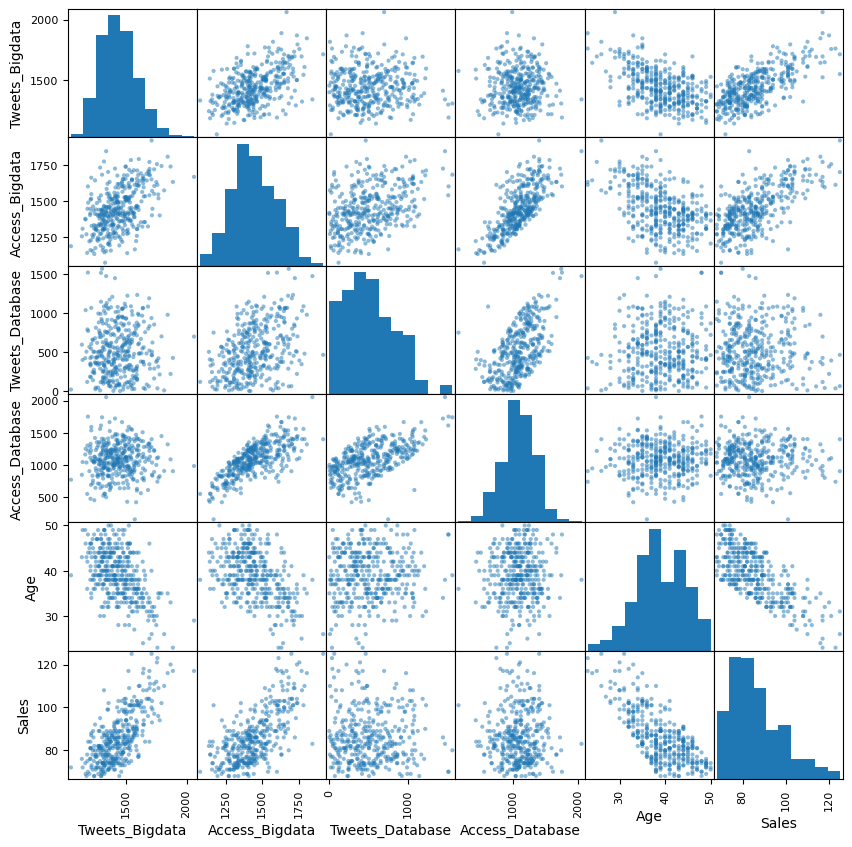

In [19]:
scatter_matrix(data, figsize = (10, 10), alpha = 0.5)

In [23]:
results = smf.ols('Sales ~ Tweets_Bigdata + Access_Bigdata + Tweets_Database + Access_Database + Age', data = data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.704e+06
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:18:17   Log-Likelihood:                 688.30
No. Observations:                 366   AIC:                            -1365.
Df Residuals:                     360   BIC:                            -1341.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -27.3386      0.045   -6

In [ ]:
print("売上 = (-27.3386) + 0.1168 * アクセス数(ビッグデータ) + (-0.0512) * アクセス数(データベース)")